In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 


%matplotlib inline 


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud

In [4]:
Data_titles = pd.read_csv("netflix_titles.csv")
Movie_titles = pd.read_csv("movie_titles.csv", on_bad_lines='skip')
Ratings = pd.read_csv("Netflix_Dataset_Rating.csv")
Data_ratings = pd.merge(Ratings, Movie_titles, on="Movie_ID")


### Dealing with the Movie Titles Data set 


#### 1.0 Handling Missing Data

In [5]:
titles = Data_titles.copy()
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Data Summary 
print("Number of Movie Titles:", len(titles))
print("Number of unique Titles:", len(titles['title'].unique()))
print("Missing Values:", titles.isnull().sum())

Number of Movie Titles: 8807
Number of unique Titles: 8807
Missing Values: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


From the above summary the every titles of movies is unique no similar movies 

There are about 2634 missing values in the attribute Director. Removing all those row could lead to missing out on special values. In this case i will replace all missing values with Unknown 

For the rest of the missing values i will replace them with mode i.e the value that occur most in the feature 


In [7]:
titles["director"].fillna("unknown", inplace=True)
mode_cast = titles["cast"].mode().iloc[0]
titles["cast"].fillna(mode_cast, inplace=True)
mode_country = titles["country"].mode().iloc[0]
titles["country"].fillna(mode_country, inplace=True)
mode_dateadded = titles["date_added"].mode().iloc[0]
titles["date_added"].fillna(mode_dateadded, inplace=True)
mode_rating = titles["rating"].mode().iloc[0]
titles["rating"].fillna(mode_rating, inplace=True)
mode_duration = titles["duration"].mode().iloc[0]
titles["duration"].fillna(mode_duration, inplace=True)
print("Missing Values:", titles.isnull().sum())

Missing Values: show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
titles.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#### 1.1 Exploratory Data Analysis 


<function matplotlib.pyplot.show(close=None, block=None)>

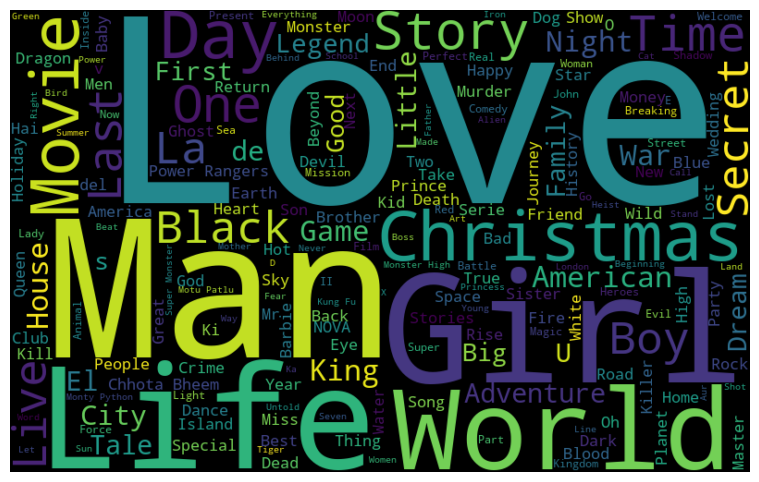

In [9]:
#Word Cloud 

wordcloud = WordCloud(width=800, height=500, background_color='black').generate(" ".join(titles['title']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

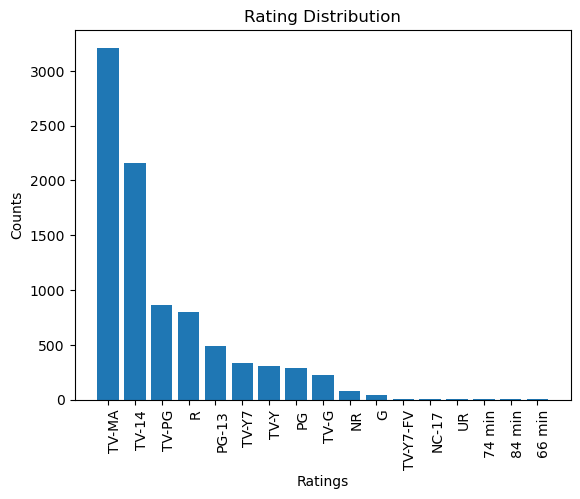

In [10]:
#Rating counts 
rating_counts = titles['rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)
plt.xticks(rotation=90, ha='left')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Rating Distribution')
plt.show()


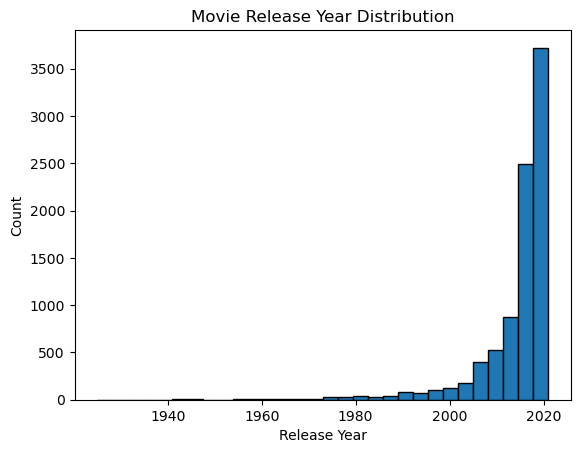

In [11]:
#Release Year Analysis 
plt.hist(titles['release_year'], bins=30, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movie Release Year Distribution')
plt.savefig("Movie_release_year.png")
plt.show()


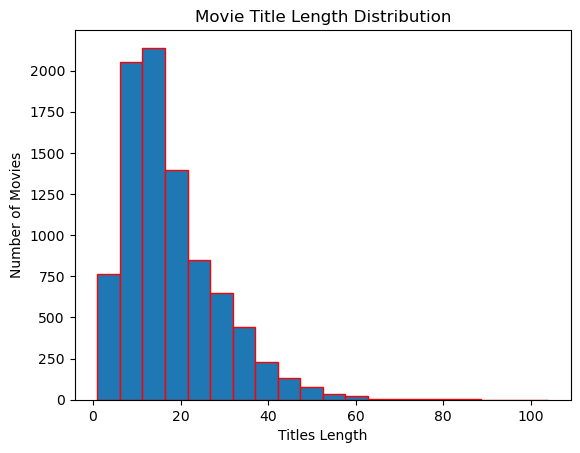

In [12]:
#Title Length distribution 
titles['title_length'] = titles['title'].apply(len)
plt.hist(titles['title_length'], bins=20, edgecolor='red')
plt.xlabel('Titles Length')
plt.ylabel('Number of Movies')
plt.title('Movie Title Length Distribution')
plt.show()

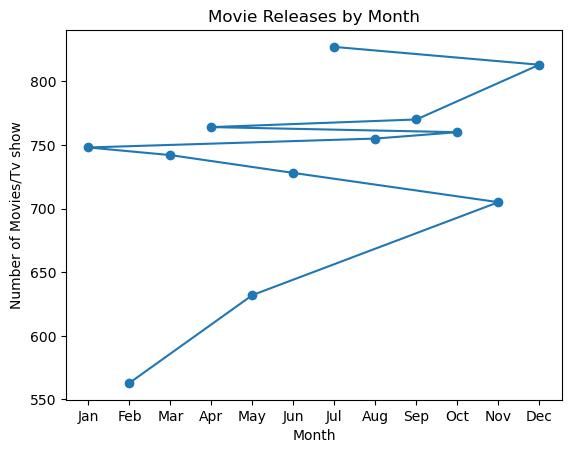

In [13]:
# Seasonal trend 

titles['date_added'] = pd.to_datetime(titles['date_added'])
titles['month'] = titles['date_added'].dt.month
monthly_counts = titles['month'].value_counts()
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Movies/Tv show')
plt.title('Movie Releases by Month')
plt.savefig("Seasonal_trend.png", dpi=100)
plt.show()


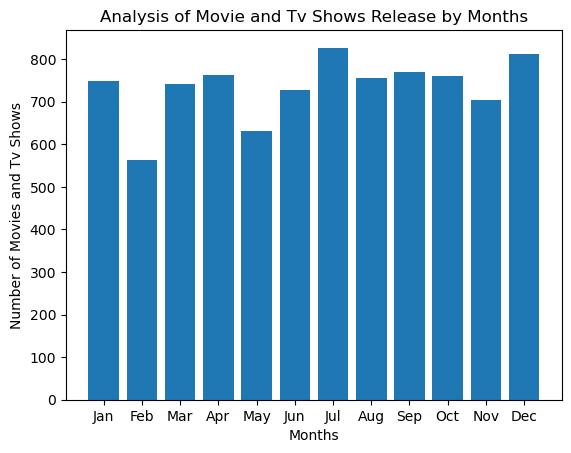

In [14]:
plt.bar(monthly_counts.index, monthly_counts.values)
# sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.xlabel('Months')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Number of Movies and Tv Shows')
plt.title("Analysis of Movie and Tv Shows Release by Months")
plt.savefig("monthly_analysis.png", dpi=100)
plt.show()

From the above trend image, its obvious that most movies or tv shows was added to netflix in July followed by December 


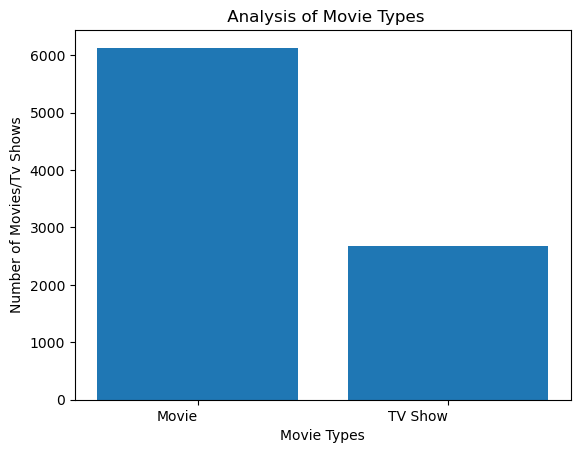

In [15]:
type_counts = titles['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Movie Types')
plt.xticks(ha='right')
plt.ylabel('Number of Movies/Tv Shows')
plt.title(' Analysis of Movie Types')
plt.show()

### 2.0  Dealing with Movie User Rating Data set 

#### 2.1 Handling missing data 

In [16]:
movie_ratings = Data_ratings.copy()
movie_ratings.head()

,User_ID,Rating,Movie_ID,Year,Name
0,712664,5,3,1997.0,Character
1,1331154,4,3,1997.0,Character
2,2632461,3,3,1997.0,Character
3,44937,5,3,1997.0,Character
4,656399,4,3,1997.0,Character


In [17]:
# Data Summary 

print("Number of ratings:", len(Ratings))
print("Number of unique users:", len(Ratings['User_ID'].unique()))
print("Number of unique movies:", len(Ratings['Movie_ID'].unique()))
print("Number of Missing values:", Ratings.isnull().sum())

Number of ratings: 17337458
Number of unique users: 143458
Number of unique movies: 1350
Number of Missing values: User_ID     0
Rating      0
Movie_ID    0
dtype: int64


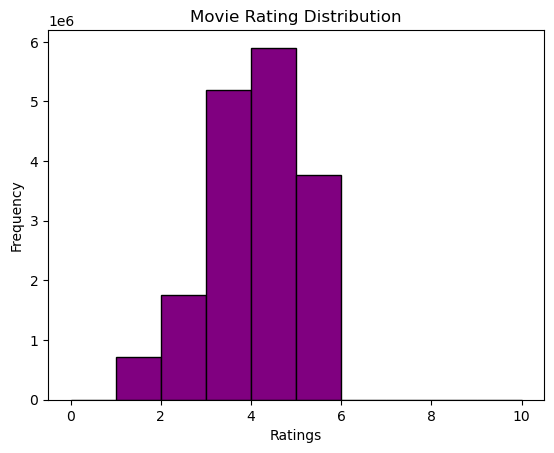

In [18]:
# Checking if the Ratings is Normally distributed using an Histogram 

plt.hist(Ratings['Rating'], bins=10, range=(0, 10), edgecolor='black', color="purple")
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Movie Rating Distribution')
plt.show()

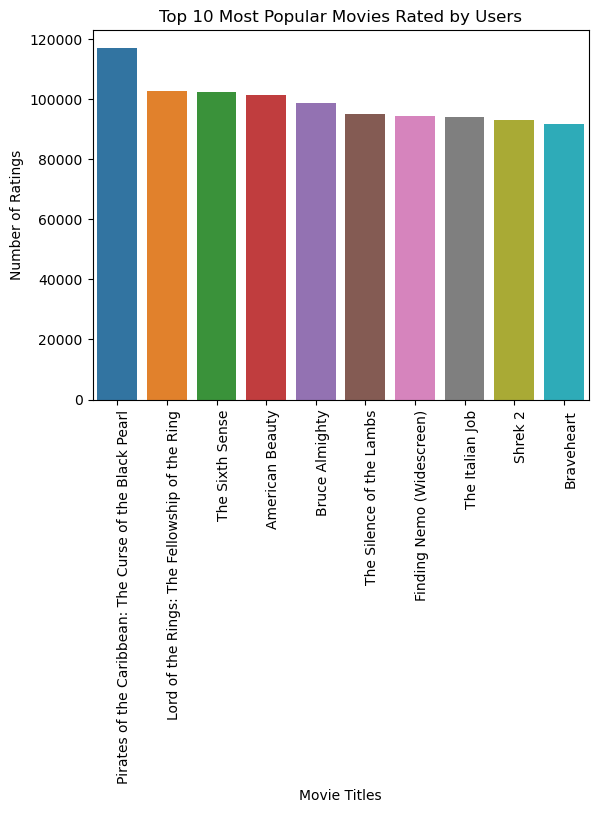

In [19]:
# Movies with highest popularity using the Movie ID attribute 
# Top to most Popular movies 

sns.barplot(x=movie_ratings["Name"].value_counts().nlargest(10).index,
            y=movie_ratings["Name"].value_counts().nlargest(10))

# movie_popularity = ratings['Movie_ID'].value_counts().nlargest(10)
# plt.bar(movie_popularity.index, movie_popularity.values)
plt.xlabel('Movie Titles')
plt.xticks(rotation=90, ha='left')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Popular Movies Rated by Users')
plt.savefig("popularly_rated.png")
plt.show()

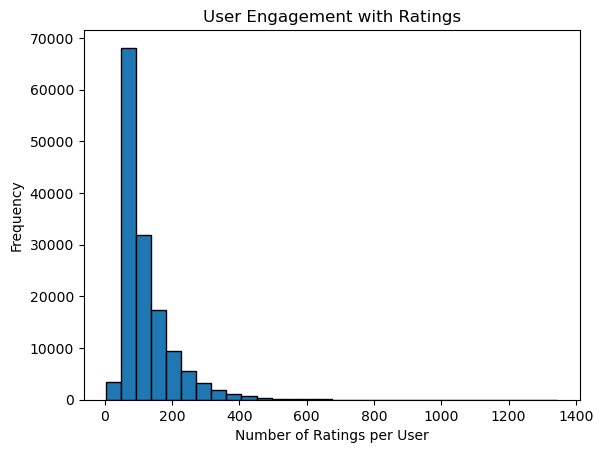

In [20]:
# Checking User engagement with each Movie 

user_usage = Ratings['User_ID'].value_counts()
plt.hist(user_usage, bins=30, edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('User Engagement with Ratings')
plt.show()

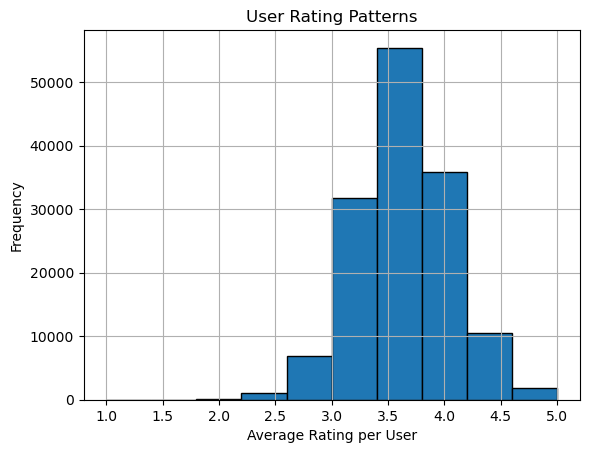

In [21]:
#The average ratings given by users are calculated by grouping the ratings based on each users ID.
user_average_ratings = Ratings.groupby('User_ID')['Rating'].mean()
user_average_ratings.hist(bins=10, edgecolor='black')
plt.xlabel('Average Rating per User')
plt.ylabel('Frequency')
plt.title('User Rating Patterns')
plt.show()

In [22]:
Ratings.corr()

,User_ID,Rating,Movie_ID
User_ID,1.000000,0.000133,-0.000034
Rating,0.000133,1.000000,-0.015326
Movie_ID,-0.000034,-0.015326,1.000000


<AxesSubplot:>

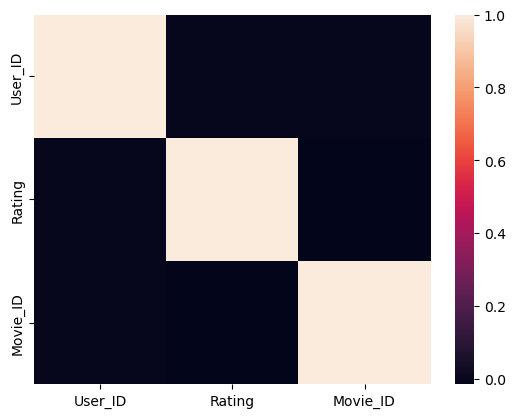

In [23]:
sns.heatmap(Ratings.corr())

# 3.0 Data Analysis Using Machine Learning Technique 

### 3.1 Analyzing the Movie Titles Data 

#### Content base recommendation system using cosine similarity 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [25]:
titles['content'] = titles['title'] + ' ' + titles['director'] + ' ' + titles['cast'] + ' ' + titles['listed_in'] + ' ' + titles['description']

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(titles['content'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
# Function to get movie recommendations based on cosine similarity
def get_cosine_recommendations(title):
    # Finding the index of the given title, in the titles dataframe.
    idx = titles[titles['title'] == title].index[0]
    
     # Creating a list of tuples containing movie indices and their corresponding cosine similarity scores.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
     # Sorting the similarity scores in descending order.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Selecting the 10 movies with highest similarity scores (excluding the given title itself).
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
     # Returning the titles of recommended movies based on their indices.
    return titles['title'].iloc[movie_indices]

In [28]:
# Test the recommendation system
movie_title = 'Narcos'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title}':")
print(get_cosine_recommendations(movie_title))

Movie recommendations based on Cosine Similarity for 'Narcos':
3298               Wild District
2921              Narcos: Mexico
6672                   El Cartel
1268        El final del paraíso
2134             The Great Heist
7258              La Viuda Negra
6652          Dueños del paraíso
1270    Sin senos sí hay paraíso
1012    Luis Miguel - The Series
7463               Miss Dynamite
Name: title, dtype: object


In [29]:
movie_title = 'Spartacus'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title}':")
print(get_cosine_recommendations(movie_title))

Movie recommendations based on Cosine Similarity for 'Spartacus':
6256                   Be Here Now
2000     Michael McIntyre: Showman
7244               Kurt & Courtney
82                         Lucifer
5069       The Shannara Chronicles
3884             Ash vs. Evil Dead
4539    Death Race: Beyond Anarchy
4367                     Sick Note
7078                      Inkheart
5495          Simplemente Manu NNa
Name: title, dtype: object


In [30]:
movie_title = 'Ganglands'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title}':")
print(get_cosine_recommendations(movie_title))

Movie recommendations based on Cosine Similarity for 'Ganglands':
2668                      Earth and Blood
3976               The Eagle of El-Se'eed
4399                              Warrior
5488         All Hail King Julien: Exiled
697     Elite Short Stories: Carla Samuel
5480          Tracy Morgan: Staying Alive
3789                       Killer Ratings
5822                              Cocaine
3297                       Paradise Beach
3425                          Street Flow
Name: title, dtype: object


In [31]:
movie_title = 'Sankofa'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title}':")
print(get_cosine_recommendations(movie_title))

Movie recommendations based on Cosine Similarity for 'Sankofa':
8238           The Carter Effect
7850    Reggie Yates Outside Man
8353                    The Hunt
5044           When We First Met
7037               I Am Jane Doe
3094                     The App
5580               One More Time
8425                   The Model
4056                      Losers
5689       Reggie Watts: Spatial
Name: title, dtype: object


In [32]:
movie_title = 'The Starling'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title}':")
print(get_cosine_recommendations(movie_title))

Movie recommendations based on Cosine Similarity for 'The Starling':
3965                     Santa Clarita Diet
604                  The Life of David Gale
5596                        Growing Up Wild
3295                     Green Eggs and Ham
3733    Adam Devine: Best Time of Our Lives
3957                               The Trap
1088                          Thunder Force
2035                     The Social Dilemma
5326          Colin Quinn: Unconstitutional
614                    What Dreams May Come
Name: title, dtype: object


In [33]:
movie_title6 = 'The Dragon Prince'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title6}':")
print(get_cosine_recommendations(movie_title6))

Movie recommendations based on Cosine Similarity for 'The Dragon Prince':
3005    DreamWorks How to Train Your Dragon Legends
2190                           The Umbrella Academy
2554                                     The Hollow
241                                        Manifest
1168                           DOTA: Dragon's Blood
7795                    Prince Jai Aur Dumdaar Viru
4946                 Star Trek: The Next Generation
539                       The New Legends of Monkey
7381                               Maharakshak Devi
5670                                    Ice Fantasy
Name: title, dtype: object


In [34]:
movie_title7 = 'Sex Doll'

print(f"Movie recommendations based on Cosine Similarity for '{movie_title7}':")
print(get_cosine_recommendations(movie_title7))

Movie recommendations based on Cosine Similarity for 'Sex Doll':
1110                                       Madame Claude
770                            Myriam Fares: The Journey
4195                                          The Doll 2
4194                                            The Doll
2211                                        Romance Doll
7892                                  Roonpi Secret Love
3224                                 Evvarikee Cheppoddu
8721                                       What Is Love?
2503                                           Game Over
5018    Trailer Park Boys: Say Goodnight to the Bad Guys
Name: title, dtype: object


### Recommendation system using Pearson correlation 

In [35]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = tfidf_vectorizer2.fit_transform(titles['content'])

# Calculate the Pearson correlation using the TF-IDF matrix
pearson_correlation = linear_kernel(tfidf_matrix2, tfidf_matrix2)

In [36]:
# Function to get movie recommendations based on cosine similarity
def get_pearson_recommendations(title):
    
    # Finding the index of the given title, in the titles dataframe.
    idx2 = titles[titles['title'] == title].index[0]
    
    # Creating a list of tuples containing movie indices and their corresponding pearson correlation scores.
    pearson_scores = list(enumerate(pearson_correlation[idx2]))
    
    # Sorting the similarity scores in descending order.
    pearson_scores = sorted(pearson_scores, key=lambda x: x[1], reverse=True)
    
    #selecting top 10 movies with the highest correlation score
    pearson_scores = pearson_scores[1:11]
    movie_indices1 = [i[0] for i in pearson_scores]
    
    #returning title of the recommendation movies based on there indices
    return titles['title'].iloc[movie_indices1]

In [37]:
# Test the recommendation system
movie_title2 = 'Narcos'

print(f"Movie recommendations based on pearson Similarity for '{movie_title2}':")
print(get_pearson_recommendations(movie_title2))

Movie recommendations based on pearson Similarity for 'Narcos':
3298               Wild District
2921              Narcos: Mexico
6672                   El Cartel
1268        El final del paraíso
2134             The Great Heist
7258              La Viuda Negra
6652          Dueños del paraíso
1270    Sin senos sí hay paraíso
1012    Luis Miguel - The Series
7463               Miss Dynamite
Name: title, dtype: object


In [38]:
movie_title2 = 'Spartacus'

print(f"Movie recommendations based on pearson Similarity for '{movie_title2}':")
print(get_pearson_recommendations(movie_title2))

Movie recommendations based on pearson Similarity for 'Spartacus':
6256                   Be Here Now
2000     Michael McIntyre: Showman
7244               Kurt & Courtney
82                         Lucifer
5069       The Shannara Chronicles
3884             Ash vs. Evil Dead
4539    Death Race: Beyond Anarchy
4367                     Sick Note
7078                      Inkheart
5495          Simplemente Manu NNa
Name: title, dtype: object


In [39]:
movie_title3 = 'Ganglands'

print(f"Movie recommendations based on pearson Similarity for '{movie_title3}':")
print(get_pearson_recommendations(movie_title3))

Movie recommendations based on pearson Similarity for 'Ganglands':
2668                      Earth and Blood
3976               The Eagle of El-Se'eed
4399                              Warrior
5488         All Hail King Julien: Exiled
697     Elite Short Stories: Carla Samuel
5480          Tracy Morgan: Staying Alive
3789                       Killer Ratings
5822                              Cocaine
3297                       Paradise Beach
3425                          Street Flow
Name: title, dtype: object


In [40]:
movie_title4 = 'Sankofa'

print(f"Movie recommendations based on pearson Similarity for '{movie_title4}':")
print(get_pearson_recommendations(movie_title4))

Movie recommendations based on pearson Similarity for 'Sankofa':
8238           The Carter Effect
7850    Reggie Yates Outside Man
8353                    The Hunt
5044           When We First Met
7037               I Am Jane Doe
3094                     The App
5580               One More Time
8425                   The Model
4056                      Losers
5689       Reggie Watts: Spatial
Name: title, dtype: object


In [41]:
movie_title5 = 'The Starling'

print(f"Movie recommendations based on pearson Similarity for '{movie_title5}':")
print(get_pearson_recommendations(movie_title5))

Movie recommendations based on pearson Similarity for 'The Starling':
3965                     Santa Clarita Diet
604                  The Life of David Gale
5596                        Growing Up Wild
3295                     Green Eggs and Ham
3733    Adam Devine: Best Time of Our Lives
3957                               The Trap
1088                          Thunder Force
2035                     The Social Dilemma
5326          Colin Quinn: Unconstitutional
614                    What Dreams May Come
Name: title, dtype: object


In [42]:
movie_title6 = 'The Dragon Prince'

print(f"Movie recommendations based on pearson Similarity for '{movie_title6}':")
print(get_pearson_recommendations(movie_title6))

Movie recommendations based on pearson Similarity for 'The Dragon Prince':
3005    DreamWorks How to Train Your Dragon Legends
2190                           The Umbrella Academy
2554                                     The Hollow
241                                        Manifest
1168                           DOTA: Dragon's Blood
7795                    Prince Jai Aur Dumdaar Viru
4946                 Star Trek: The Next Generation
539                       The New Legends of Monkey
7381                               Maharakshak Devi
5670                                    Ice Fantasy
Name: title, dtype: object


In [43]:
movie_title7 = 'Sex Doll'

print(f"Movie recommendations based on pearson Similarity for '{movie_title7}':")
print(get_pearson_recommendations(movie_title7))

Movie recommendations based on pearson Similarity for 'Sex Doll':
1110                                       Madame Claude
770                            Myriam Fares: The Journey
4195                                          The Doll 2
4194                                            The Doll
2211                                        Romance Doll
7892                                  Roonpi Secret Love
3224                                 Evvarikee Cheppoddu
8721                                       What Is Love?
2503                                           Game Over
5018    Trailer Park Boys: Say Goodnight to the Bad Guys
Name: title, dtype: object


### Recommendation system using kmean on movie title data 

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [45]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english')
tfidf_matrix3 = tfidf_vectorizer3.fit_transform(titles['content'])

In [46]:
encoder = LabelEncoder()
titles['type_encoded'] = encoder.fit_transform(titles['type'])

In [47]:
# KMeans clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
titles['cluster'] = kmeans.fit_predict(tfidf_matrix3)

In [48]:
# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_matrix3, titles['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.004103641483142342


In [49]:
# Recommend top 10 movies from each cluster
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id + 1} - Top 10 Recommended Movies:")
    cluster_movies = titles[titles['cluster'] == cluster_id]
    cluster_movies = cluster_movies.sort_values(by='rating', ascending=False).head(10)
    for idx, movie in enumerate(cluster_movies['title'], start=1):
        print(f"{idx}. {movie}")
    print() 

Cluster 1 - Top 10 Recommended Movies:
1. What's Up?
2. The Knight and the Princess
3. Kalek Shanab
4. Freej Al Taibeen
5. Lock Your Girls In
6. The American Game
7. The Witness Who Didn't See Anything
8. Either Me Or My Auntie
9. My Sleeping Lover
10. Wedy Atkalam

Cluster 2 - Top 10 Recommended Movies:
1. Kevin James: Sweat the Small Stuff
2. Gangs of Hassepur
3. Kevin James: Never Don't Give Up
4. Jim Gaffigan: King Baby
5. Brian Regan: Nunchucks and Flamethrowers
6. Fred Armisen: Standup For Drummers
7. Spiritual House
8. Stand Up and Away! with Brian Regan
9. Jerry Seinfeld: 23 Hours To Kill
10. Revelations: The Masters of the Universe: Revelation Aftershow

Cluster 3 - Top 10 Recommended Movies:
1. Power Battle Watch Car
2. MONKART
3. Running Man
4. Miniforce
5. Flowering Heart
6. 최강전사 미니특공대 : 영웅의 탄생
7. Vroomiz
8. Space Jungle
9. Titipo Titipo
10. Kongsuni and Friends

Cluster 4 - Top 10 Recommended Movies:
1. Dear Dracula
2. Little Singham aur Kaal ka Mahajaal
3. Motu Patlu: Kin

In [50]:
num_clusters1 = 5
kmeans1 = KMeans(n_clusters=num_clusters1, random_state=42)
titles['cluster'] = kmeans1.fit_predict(tfidf_matrix3)

# Calculate silhouette score
silhouette_avg1 = silhouette_score(tfidf_matrix3, titles['cluster'])
print(f"Silhouette Score: {silhouette_avg1}")

Silhouette Score: 0.0024280893377050298


In [51]:
num_clusters1 = 3
kmeans2 = KMeans(n_clusters=num_clusters1, random_state=42)
titles['cluster'] = kmeans2.fit_predict(tfidf_matrix3)

# Calculate silhouette score
silhouette_avg2 = silhouette_score(tfidf_matrix3, titles['cluster'])
print(f"Silhouette Score: {silhouette_avg2}")

Silhouette Score: 0.0034398282099083787


In [52]:
num_clusters3 = 30
kmeans3 = KMeans(n_clusters=num_clusters3, random_state=42)
titles['cluster'] = kmeans3.fit_predict(tfidf_matrix3)

# Calculate silhouette score
silhouette_avg3 = silhouette_score(tfidf_matrix3, titles['cluster'])
print(f"Silhouette Score: {silhouette_avg3}")

Silhouette Score: 0.005562808710856187


### 3.2 Collaborative Movie Recommendation System 

In [53]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

df = Data_ratings.drop(["Year", "Name"], axis=1)

# Create a user-item matrix
user_item_matrix = df.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(0)


In [54]:
# Convert the user-item matrix to a numpy array
R = user_item_matrix.values

# Perform Singular Value Decomposition (SVD)
U, sigma, Vt = svd(R, full_matrices=False) 

In [55]:
# Diagonal matrix of singular values
sigma_diag = np.diag(sigma)

# Predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt)

# Convert the predicted ratings back to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)

In [56]:

user_id = 500
user_ratings = predicted_ratings_df.loc[user_id]
recommended_movies = pd.DataFrame(user_ratings.sort_values(ascending=False).index)
Recommended_movies = pd.merge(recommended_movies, Movie_titles, on="Movie_ID")


print("Recommended movies for user", user_id)
Recommended_movies.head(10)

Recommended movies for user 500


,Movie_ID,Year,Name
0,3938,2004.0,Shrek 2
1,473,1997.0,Princess Mononoke
2,3446,2002.0,Spirited Away
3,2153,1993.0,Free Willy
4,3079,1994.0,The Lion King: Special Edition
5,3925,2003.0,The Matrix: Reloaded
6,257,1973.0,Charlotte's Web
7,3817,1994.0,Stargate
8,3239,2001.0,The Princess Diaries (Fullscreen)
9,468,2003.0,The Matrix: Revolutions


The recommended movies are determined based on the users ratings. We can obtain the users ratings, from the predicted_ratings_df. Then sort them in descending order to identify the highly rated movies. Finally we create a dataframe, with the recommended movies listed.


In [57]:
#conda install -c conda-forge scikit-surprise

In [58]:
import pandas as pd
from surprise import Dataset, Reader,KNNBasic
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [59]:
#Reader class with rating sclae of 1 to 5 is used 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User_ID', 'Movie_ID', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create an SVD model and train it
svd_model = SVD(n_factors=10, n_epochs=20, random_state=42)
svd_model.fit(trainset)

In [60]:
predictions = svd_model.test(testset)

# Calculate RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.8534
MAE:  0.6635
RMSE: 0.85342506618854
MAE: 0.6635491147817758


In [61]:
# Recommend movies for a specific user
user_id = 600
recommended_movies = []
for movie_id in range(1, df['Movie_ID'].max() + 1):
    if not any(item[1] == movie_id for item in df[df['User_ID'] == user_id][['User_ID', 'Movie_ID']].values):
        predicted_rating = svd_model.predict(user_id, movie_id).est
        recommended_movies.append((movie_id, predicted_rating))

recommended_movies.sort(key=lambda x: x[1], reverse=True)

In [62]:
print("Recommended movies for user", user_id)
Movies = pd.DataFrame(recommended_movies)
Movies.columns = ["Movie_ID", "Predicted_ratings"]
Recommended_films = pd.merge(Movies, Movie_titles, on="Movie_ID")
Recommended_films.head(10)

Recommended movies for user 600


,Movie_ID,Predicted_ratings,Year,Name
0,3456,4.579060,2004.0,Lost: Season 1
1,4427,4.542390,2001.0,The West Wing: Season 3
2,2102,4.449588,1994.0,The Simpsons: Season 6
3,2452,4.440892,2001.0,Lord of the Rings: The Fellowship of the Ring
4,1476,4.424243,2004.0,Six Feet Under: Season 4
5,2114,4.400946,2002.0,Firefly
6,2803,4.368841,1995.0,Pride and Prejudice
7,2162,4.359579,2000.0,CSI: Season 1
8,3962,4.320619,2003.0,Finding Nemo (Widescreen)
9,3958,4.320129,2003.0,Monk: Season 2


#### Recommendation System Using Nearest Neighbors 

In [63]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [64]:
df = Data_ratings.copy()

#coverting categorical variables to numerical variables

encoder = LabelEncoder()

# Encode the 'User_ID' and 'Movie_ID' columns in the DataFrame
df['Encoded_User'] = encoder.fit_transform(df['User_ID'])
df['Encoded_Movie'] = encoder.fit_transform(df['Movie_ID'])

In [65]:
# Create a pivot table for user-item ratings
ratings_matrix = df.pivot_table(index='Encoded_User', columns='Encoded_Movie', values='Rating', fill_value=0)
csr_ratings_matrix = csr_matrix(ratings_matrix)

In [66]:
# Create a NearestNeighbors model
model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
model.fit(csr_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [67]:
# Choose a user for recommendation
target_user = 600

# Find the nearest neighbors (similar users) to the target user
distances, indices = model.kneighbors(csr_ratings_matrix[target_user])

# Extract similar users' indices
similar_users = indices.squeeze()[1:]  # Exclude the target user

# Find movies liked by similar users but not rated by the target user
user_ratings = csr_ratings_matrix[target_user].toarray().flatten()
similar_users_ratings = csr_ratings_matrix[similar_users].toarray()
unrated_movies_indices = np.where(user_ratings == 0)[0]
similar_users_rated_movies = similar_users_ratings[:, unrated_movies_indices]
recommended_movies_indices = np.argsort(-np.sum(similar_users_rated_movies, axis=0))[:10]
recommended_movie_ids = encoder.inverse_transform(recommended_movies_indices)

print(f"Top 10 recommended movies for user {target_user}:")
for movie_id in recommended_movie_ids:
    movie_name = df[df['Movie_ID'] == movie_id]['Name'].iloc[0]
    print(movie_name)

Top 10 recommended movies for user 600:
The Missing
Bride and Prejudice
One True Thing
VeggieTales Classics: Where's God When I'm Scared?
Ringu
Millennium Actress
Presumed Innocent
The Final Cut
Replicant
Teenage Mutant Ninja Turtles III


In [68]:
# Evaluate the recommendation system
from sklearn.metrics import precision_score, recall_score, f1_score


actual_ratings = user_ratings[unrated_movies_indices]
predicted_ratings = np.mean(similar_users_rated_movies, axis=0)


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print("RMSE :",rmse)
print("MAE :",mae)

RMSE : 0.5815569636968433
MAE : 0.22044534412955466


In [70]:
# Create a NearestNeighbors model
model = NearestNeighbors(n_neighbors=3, algorithm='brute', metric='cosine')
model.fit(csr_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)

In [71]:
# Choose a user for recommendation
target_user = 600

# Find the nearest neighbors (similar users) to the target user
distances, indices = model.kneighbors(csr_ratings_matrix[target_user])

# Extract similar users' indices
similar_users = indices.squeeze()[1:]  # Exclude the target user

# Find movies liked by similar users but not rated by the target user
user_ratings = csr_ratings_matrix[target_user].toarray().flatten()
similar_users_ratings = csr_ratings_matrix[similar_users].toarray()
unrated_movies_indices = np.where(user_ratings == 0)[0]
similar_users_rated_movies = similar_users_ratings[:, unrated_movies_indices]
recommended_movies_indices = np.argsort(-np.sum(similar_users_rated_movies, axis=0))[:10]
recommended_movie_ids = encoder.inverse_transform(recommended_movies_indices)

print(f"Top 10 recommended movies for user {target_user}:")
for movie_id in recommended_movie_ids:
    movie_name = df[df['Movie_ID'] == movie_id]['Name'].iloc[0]
    print(movie_name)

Top 10 recommended movies for user 600:
MI-5: Vol. 2
Jason Goes to Hell
Better Than Sex
Head in the Clouds
Millennium Actress
VeggieTales Classics: Where's God When I'm Scared?
The Missing
The Seventh Seal
The Final Cut
Dante's Peak


In [72]:
actual_ratings = user_ratings[unrated_movies_indices]
predicted_ratings = np.mean(similar_users_rated_movies, axis=0)


In [73]:
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print("RMSE :",rmse)
print("MAE :",mae)

RMSE : 0.7823974367211681
MAE : 0.26558704453441295


In [74]:
# Create a NearestNeighbors model
model = NearestNeighbors(n_neighbors=19, algorithm='brute', metric='cosine')
model.fit(csr_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=19)

In [75]:
# Choose a user for recommendation
target_user = 600

# Find the nearest neighbors (similar users) to the target user
distances, indices = model.kneighbors(csr_ratings_matrix[target_user])

# Extract similar users' indices
similar_users = indices.squeeze()[1:]  # Exclude the target user

# Find movies liked by similar users but not rated by the target user
user_ratings = csr_ratings_matrix[target_user].toarray().flatten()
similar_users_ratings = csr_ratings_matrix[similar_users].toarray()
unrated_movies_indices = np.where(user_ratings == 0)[0]
similar_users_rated_movies = similar_users_ratings[:, unrated_movies_indices]
recommended_movies_indices = np.argsort(-np.sum(similar_users_rated_movies, axis=0))[:10]
recommended_movie_ids = encoder.inverse_transform(recommended_movies_indices)

print(f"Top 10 recommended movies for user {target_user}:")
for movie_id in recommended_movie_ids:
    movie_name = df[df['Movie_ID'] == movie_id]['Name'].iloc[0]
    print(movie_name)

Top 10 recommended movies for user 600:
The Missing
Presumed Innocent
Croupier
Ringu
VeggieTales Classics: Where's God When I'm Scared?
Aladdin: Platinum Edition
Fame
The Best of Friends: Vol. 4
Millennium Actress
Teenage Mutant Ninja Turtles III


In [76]:
actual_ratings = user_ratings[unrated_movies_indices]
predicted_ratings = np.mean(similar_users_rated_movies, axis=0)

In [77]:
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print("RMSE :",rmse)
print("MAE :",mae)

RMSE : 0.47562414108910056
MAE : 0.20913180386864602


#### Movie Recommendation system using Kmeans 

In [78]:
from sklearn.cluster import KMeans

In [79]:
# Select relevant features for clustering
features = df[['Encoded_User', 'Rating', 'Encoded_Movie', 'Year']]

In [80]:
#Create a KMeans model
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

In [81]:
# Choose a user for recommendation and evaluation
target_user = 600

# Find the cluster of the target user
target_cluster = df[df['Encoded_User'] == target_user]['Cluster'].iloc[0]

# Find the most popular movies within the cluster
cluster_movies = df[df['Cluster'] == target_cluster]
popular_movies = cluster_movies.groupby('Encoded_Movie')['Rating'].mean().sort_values(ascending=False)

# Get top 10 recommended movies
recommended_movie_ids = popular_movies.index[:10]
recommended_movie_names = df[df['Encoded_Movie'].isin(recommended_movie_ids)]['Name']

print(f"Top 10 recommended movies for user {target_user}:")
for movie_id in recommended_movie_ids:
    movie_name = df[df['Encoded_Movie'] == movie_id]['Name'].iloc[0]
    print(movie_name)

Top 10 recommended movies for user 600:
Lost: Season 1
The Simpsons: Season 6
Family Guy: Freakin' Sweet Collection
The Best of Friends: Vol. 4
Inu-Yasha
Six Feet Under: Season 4
The West Wing: Season 3
Lord of the Rings: The Fellowship of the Ring
The Simpsons: Season 3
The Simpsons: Treehouse of Horror


In [82]:
# Evaluate the recommendation system
actual_movies = df[df['Encoded_User'] == target_user]['Encoded_Movie']
predicted_movies = recommended_movie_ids

intersection = len(set(actual_movies) & set(predicted_movies))
precision = intersection / len(predicted_movies) if len(predicted_movies) > 0 else 0
recall = intersection / len(actual_movies) if len(actual_movies) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1-score: 0.00


In [ ]:
import numpy as np 

zero = np.